# U.S., Texas, and Pennsylvania Natural Gas Production

This project examines trends in natural gas production across the United States, Texas, and Pennsylvania, with a special focus on the significant increase since the year 2000.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [13]:
file_path = 'downloads/US_Natural_Gas_Production_Trends.csv'

df = pd.read_csv(file_path)
df = pd.read_csv('downloads/US_Natural_Gas_Production_Trends.csv', skiprows=2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 38 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Date                                                                                95 non-null     float64
 1   U.S. Dry Natural Gas Production (MMcf)                                              95 non-null     float64
 2   Alabama Dry Natural Gas Production (Million Cubic Feet)                             42 non-null     float64
 3   Alaska Dry Natural Gas Production (Million Cubic Feet)                              42 non-null     float64
 4   Arizona Dry Natural Gas Production (Million Cubic Feet)                             42 non-null     float64
 5   Arkansas Dry Natural Gas Production (Million Cubic Feet)                            42 non-null     f

In [15]:
columns = [
    'Date',
    'U.S. Dry Natural Gas Production (MMcf)',
    'Texas Dry Natural Gas Production (Million Cubic Feet)',
    'Pennsylvania Dry Natural Gas Production (Million Cubic Feet)'
]

df_clean = df[columns]

In [16]:
df_clean = df_clean[pd.to_numeric(df_clean['Date'], errors='coerce').notnull()]
df_clean['Date'] = df_clean['Date'].astype(int)

## Visualising Natural Gas Production (1930–2023)

The plot below displays the complete historical dataset, providing a long-term view of natural gas production trends.

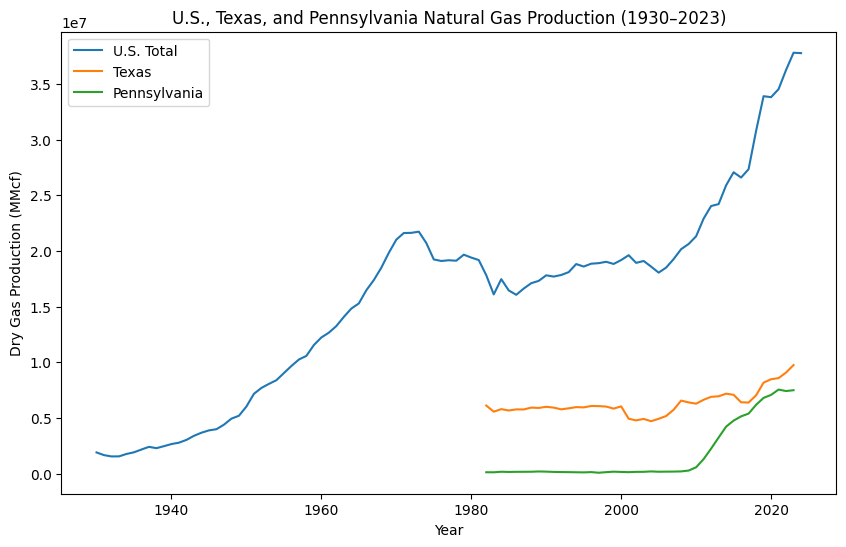

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df_clean['Date'], df_clean['U.S. Dry Natural Gas Production (MMcf)'], label='U.S. Total')
plt.plot(df_clean['Date'], df_clean['Texas Dry Natural Gas Production (Million Cubic Feet)'], label='Texas')
plt.plot(df_clean['Date'], df_clean['Pennsylvania Dry Natural Gas Production (Million Cubic Feet)'], label='Pennsylvania')

plt.xlabel('Year')
plt.ylabel('Dry Gas Production (MMcf)')
plt.title('U.S., Texas, and Pennsylvania Natural Gas Production (1930–2023)')
plt.legend()
plt.show()

### Analysis of Natural Gas Production Trends (1930–2023)

- **U.S. total production** shows a steady increase from 1930 until around 1970, followed by a long plateau. After 2000, there is a dramatic surge in production, with the steepest growth occurring after 2005.
- **Texas production** remains relatively stable for much of the period but starts to rise steadily after 2010, contributing significantly to the national increase.
- **Pennsylvania production** remains minimal until the late 2000s. From 2008 onwards, Pennsylvania experiences explosive growth, quickly becoming a leading producer by 2023.
- The **year 2000** represents a clear turning point, corresponding with technological advances in gas extraction (e.g., fracking) and the U.S. shale boom.
- The most significant production increases since 2000 are seen in the U.S. overall and in Pennsylvania, highlighting the impact of new extraction techniques and the rapid development of shale gas resources.


# Natural Gas Production Growth (2000 vs. 2023)

The table below compares natural gas production in 2000 and 2023 for the U.S., Texas, and Pennsylvania, and shows both the absolute and percentage growth over this period.

In [18]:
# Filter for years 2000 and 2023
df_2000 = df_clean[df_clean['Date'] == 2000]
df_2023 = df_clean[df_clean['Date'] == 2023]

# Extract production numbers
def get_production(row, col):
    return row[col].values[0] if not row.empty else None

regions = {
    "U.S. Total": 'U.S. Dry Natural Gas Production (MMcf)',
    "Texas": 'Texas Dry Natural Gas Production (Million Cubic Feet)',
    "Pennsylvania": 'Pennsylvania Dry Natural Gas Production (Million Cubic Feet)'
}

# Create a summary table
summary = []
for name, col in regions.items():
    prod_2000 = get_production(df_2000, col)
    prod_2023 = get_production(df_2023, col)
    growth = prod_2023 - prod_2000
    pct_growth = (growth / prod_2000) * 100 if prod_2000 else None
    summary.append({
        "Region": name,
        "2000 Production": prod_2000,
        "2023 Production": prod_2023,
        "Growth (MMcf)": growth,
        "Growth (%)": pct_growth
    })


summary_df = pd.DataFrame(summary)
summary_df

,Region,2000 Production,2023 Production,Growth (MMcf),Growth (%)
0,U.S. Total,19181980.0,37803268.0,18621288.0,97.076986
1,Texas,6037631.0,9751071.0,3713440.0,61.504918
2,Pennsylvania,149414.0,7490323.0,7340909.0,4913.133307


## Visualising Growth

This bar plot highlights the dramatic growth in natural gas production for each region between 2000 and 2023, especially the explosive increase in Pennsylvania.

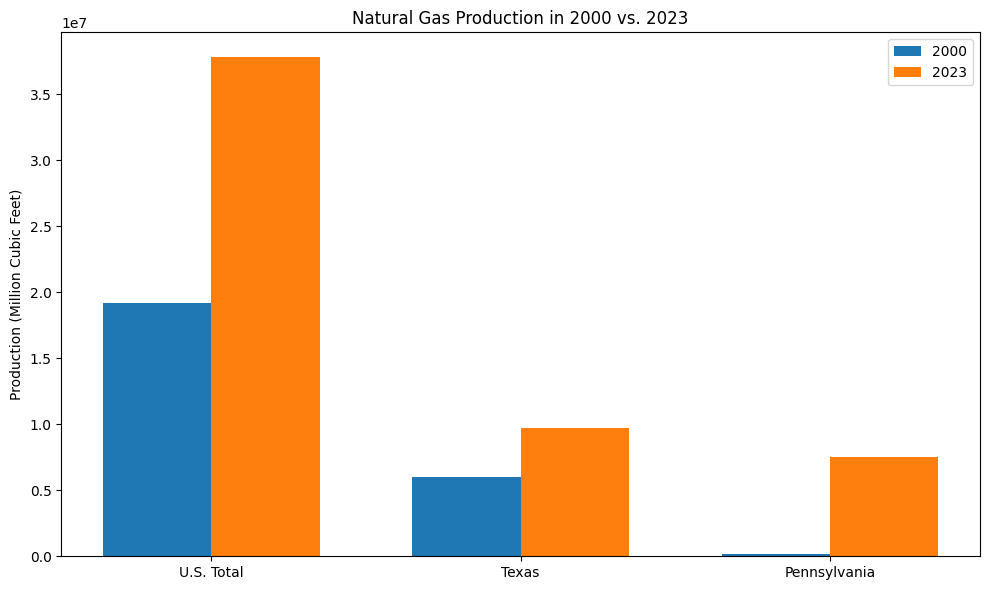

In [19]:
labels = summary_df['Region']
prod_2000 = summary_df['2000 Production']
prod_2023 = summary_df['2023 Production']

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, prod_2000, width, label='2000')
plt.bar([i + width for i in x], prod_2023, width, label='2023')

plt.ylabel('Production (Million Cubic Feet)')
plt.title('Natural Gas Production in 2000 vs. 2023')
plt.xticks([i + width/2 for i in x], labels)
plt.legend()
plt.tight_layout()
plt.show()

### Key Takeaways

- Pennsylvania saw the largest percentage increase by far, transforming from a minor producer to nearly matching Texas by 2023.
- Texas and the U.S. total also experienced significant growth, driven by technological advancements and the shale boom.
- The data and plots clearly show the shift in U.S. energy production, with the biggest changes occurring after 2000.

In [20]:
df_recent = df_clean[(df_clean['Date'] >= 2000) & (df_clean['Date'] <= 2023)]

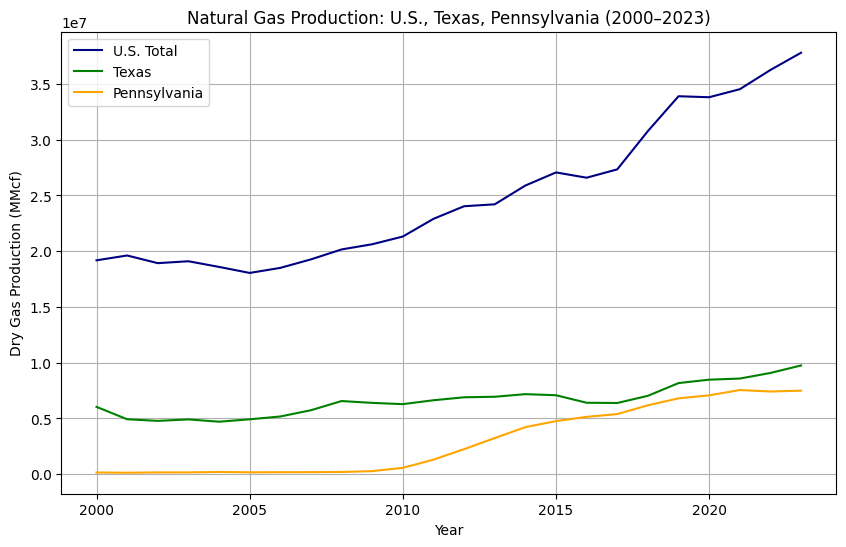

In [21]:
plt.figure(figsize=(10,6))
plt.plot(df_recent['Date'], df_recent['U.S. Dry Natural Gas Production (MMcf)'], label='U.S. Total', color='navy')
plt.plot(df_recent['Date'], df_recent['Texas Dry Natural Gas Production (Million Cubic Feet)'], label='Texas', color='green')
plt.plot(df_recent['Date'], df_recent['Pennsylvania Dry Natural Gas Production (Million Cubic Feet)'], label='Pennsylvania', color='orange')
plt.xlabel('Year')
plt.ylabel('Dry Gas Production (MMcf)')
plt.title('Natural Gas Production: U.S., Texas, Pennsylvania (2000–2023)')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of Natural Gas Production (2000–2023)

- **U.S. natural gas production** saw modest growth in the early 2000s, but experienced a dramatic surge after 2008, reaching record highs by 2023. This growth is largely attributed to technological breakthroughs such as fracking and horizontal drilling.
- **Texas** maintained steady production with noticeable growth after 2010, reinforcing its role as a major producer.
- **Pennsylvania** transformed from a minor producer to a major one, especially after 2008, due to the rapid development of the Marcellus Shale. Its production nearly caught up to Texas by 2023.
- The trends in this graph reflect broader economic, technological, and policy shifts that redefined the U.S. natural gas industry in the 21st century.


## Conclusion

This analysis clearly demonstrates that the dramatic rise in U.S. natural gas production since 2000 is not just a statistical trend, but the direct result of several key real-world factors. 

The most important driver has been the rapid advancement and widespread adoption of hydraulic fracturing ("fracking") and horizontal drilling technologies. These innovations unlocked vast new reserves of natural gas from shale formations, especially in states like Pennsylvania (the Marcellus Shale, which were previously inaccessible or uneconomical to produce. As a result, states like Pennsylvania saw an exponential increase in production, fundamentally reshaping the U.S. energy landscape.

In addition to technological breakthroughs, other factors also contributed to the boom:
- **Market Dynamics:** Rising natural gas prices in the early 2000s created a strong financial incentive for producers to invest in new extraction methods.
- **Policy Support:** Federal and state policies, including tax incentives and deregulation, helped encourage exploration and production, especially in regions with large shale deposits.
- **Infrastructure Investment:** Expanded pipeline networks and export capabilities enabled more gas to be transported from producing regions to markets.

Together, these factors led to a new era of U.S. energy abundance, with profound effects on domestic energy prices, global markets, and even environmental policy. The dramatic increases seen in Pennsylvania and Texas after 2000 highlight how local geology, technology, and policy can converge to drive transformational change.
